# Using Pretrained Models to find Similarity

##### The Scope of this project is to compare different types of pretrained model and also find the similarity score by using word embeddings.



The training data is a combination of well-known NLI datasets: SNLI, MNLI, FEVER-NLI, ANLI (R1, R2, R3). The snipit of the corpus is given below:

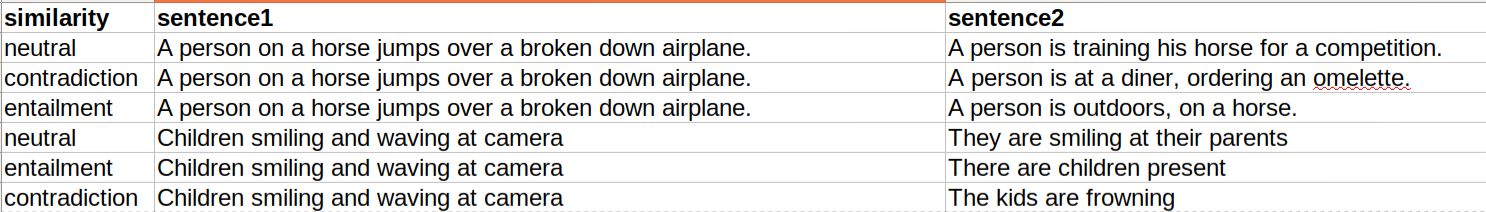

These corpus is trained on "RoBERTa" NLI model.

Now, let us begin the project.

### 1. Import Packages and Modules

In [1]:
from src.predictions import *
from transformers import AutoTokenizer, AutoModelForSequenceClassification

### 2. Initializing Necessary Attributes

In [2]:
pretrained_model_name = "ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli"

In [3]:
label_mapping = {
    0: 'entailment',
    1: 'neutral',
    2: 'contradiction',
}

In [4]:
testing_dataset_path = "dataset/snli_testing.csv"

### 3. Load Tokenizer and Model

So now comes the main section which is a bit technical. We will be talking about RoBERTa. To understand this, we should know the concept of BERT (Bidirectional Encoder Representations from Transformers) and before knowing BERT we should understand Transformers.
I will try to explain these in short.

###### Transformer:
- Transformer has a encoder/decoder architecture for NLI just like RNN but the difference here is that the input values in Transformer can be passed parallely unlike the RNN.

Attention, Self Attention and Multiheaded Attention: Attention means to learn to weight the relationship of each item in the input sequence to items in the output sequence. Self-attention means to learn to weight the relnship of each item in the input sequence to all other items in the input sequence. Multiheaded Attention means to learn multiple ways to weight the relnship of each item in the input 
sequence to all other items in the input.

- The Transformer has a stack of multiheaded attention layers inside encoder and decoder.

Adv: Emphasizes on Parallelization, Ignores orders of sequence so relnship between items can be established at distant apart.
DisAdv: Takes alot of memory and computation power, Hard to manage hyperparameters.

::> We should not use Transformer models until we have alot of data <::


###### BERT:
- It is a Large Transformer: BERT makes use of multiheaded attention mechanism. BERT’s goal is to generate a language model, so only the encoder mechanism from Transformer is necessary.

- It is a Masked Language Model: 15% of the words in each input sequence are replaced with a [MASK] token. The model then attempts to predict the original value of the masked words, based on the context provided by the other, non-masked, words in the sequence.  In simple words, BERT model plays "Fill in the blanks" to derive contexts from input sequence.Another eg is traditional word embeddings couldn't differentiate between a dog bark and a tree brak whereas contextual word embeddings can.

Adv: It's transferable(meaning it can be used as input to smaller, task specific models), It can be easily fine tuned, has many languages available.
Disadv: Big, slow and Expensive.


###### RoBERTa:
- Robustly Optimized BERT Pre-training Approach
- Extension architecture of BERT.
- RoBERTa is some modifications done on the BERT model to make it more robust. Modifications related to Next Sentence Prediction, batch size, masking patterns and more.

There are other modifications on BERT as well like Albert, Xlnet, bart etc.

In [5]:
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name)
model = AutoModelForSequenceClassification.from_pretrained(pretrained_model_name)

Some weights of the model checkpoint at ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Now let us use the tokenizer and model from above to predict if the given sentences are similar, neutral or non similar.

In [6]:
sentence_one = "I love all the cats."
sentence_two = "I love all the dogs."
predicted_probability, pred_index = get_prediction(tokenizer, model, sentence_one, sentence_two)

probability_percentage = (predicted_probability[int(pred_index)]*100)
predicted_label = label_mapping[int(pred_index)]

print("The sentences seem to have {probability_percentage:.2f}% probability to be {predicted_label}.".format(probability_percentage=probability_percentage, predicted_label=predicted_label))

The sentences seem to have 99.90% probability to be contradiction.


### 4. Evaluation

Lets check out the accuracy of this model by testing it on a test set that i downloaded from the Stanford Natural Language Inference (SNLI) Corpus.

In [7]:
df_test = pd.read_csv(testing_dataset_path)
evaluate(tokenizer, model, label_mapping, df_test)

Out of 100 pair of sentences, 92 were found to be correctly predicted. Accuracy of this model is 92%
